In [1]:
import pandas as pd
import numpy as np


train = pd.read_csv('CVKaggleData/train.csv')
trainDF = train.iloc[1:]
submission = pd.read_csv('CVKaggleData/submission.csv')



####Training images == the train csv
####Testing images == the test csv


display(trainDF.head())
print("length of train: " , len(train))

name   x1   x2   y1   y2                 classname
1  2756.png  505   10  723  283            face_with_mask
2  2756.png   75  252  264  390             mask_colorful
3  2756.png  521  136  711  277             mask_colorful
4  6098.jpg  360   85  728  653              face_no_mask
5  6427.png  218   98  577  580  face_with_mask_incorrect

length of train:  15412


In [2]:
display(submission.head())
print("length of submission: " , len(submission))

name  x1  x2  y1  y2  classname
0  1800.jpg NaN NaN NaN NaN        NaN
1  1800.jpg NaN NaN NaN NaN        NaN
2  1800.jpg NaN NaN NaN NaN        NaN
3  1799.jpg NaN NaN NaN NaN        NaN
4  1799.jpg NaN NaN NaN NaN        NaN

length of submission:  8142


In [3]:
print(train["name"])
print(train["classname"])

0        2756.png
1        2756.png
2        2756.png
3        2756.png
4        6098.jpg
           ...   
15407    1894.jpg
15408    1894.jpg
15409    1894.jpg
15410    3216.png
15411    3216.png
Name: name, Length: 15412, dtype: object
0        face_with_mask
1        face_with_mask
2         mask_colorful
3         mask_colorful
4          face_no_mask
              ...      
15407    face_with_mask
15408     mask_surgical
15409               hat
15410    face_with_mask
15411     mask_colorful
Name: classname, Length: 15412, dtype: object


In [4]:
myList = []
for idx, row in train.iterrows():
    train.loc[idx, "name"] = "CVKaggleData/Medical mask/Medical mask/Medical mask/images/" + train.loc[idx , "name"]
    #train.loc[idx, "x1"] = [train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]]
    myList.append([train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]])
    #print(myList[-1])
    #train.loc[idx, "newCol"] = pd.Series(np.array(myList[-1]))
    #if  df.loc[idx,'Qty'] == 1 and df.loc[idx,'Price'] == 10:
    #    df.loc[idx,'Buy'] = 1
train["newCol"] = myList
dicty = {}
for idx, row in train.iterrows():
    if train.loc[idx , "name"] not in dicty:
        dicty[train.loc[idx , "name"]] =  [train.loc[idx , "newCol"]]
    else:
        dicty[train.loc[idx , "name"]] +=  [train.loc[idx , "newCol"]]
    
    #train.loc[idx, "name"] = 
    #train.loc[idx, "x1"] = [train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]]
    #myList.append([train.loc[idx, "x1"] , train.loc[idx, "x2"] , train.loc[idx, "y1"] , train.loc[idx, "y2"]])
    #print(myList[-1])
    #train.loc[idx, "newCol"] = pd.Series(np.array(myList[-1]))
    #if  df.loc[idx,'Qty'] == 1 and df.loc[idx,'Price'] == 10:
    #    df.loc[idx,'Buy'] = 1

valueee = train.copy()
display(train)




name   x1   x2   y1   y2  \
0      CVKaggleData/Medical mask/Medical mask/Medical...   69  126  294  392   
1      CVKaggleData/Medical mask/Medical mask/Medical...  505   10  723  283   
2      CVKaggleData/Medical mask/Medical mask/Medical...   75  252  264  390   
3      CVKaggleData/Medical mask/Medical mask/Medical...  521  136  711  277   
4      CVKaggleData/Medical mask/Medical mask/Medical...  360   85  728  653   
...                                                  ...  ...  ...  ...  ...   
15407  CVKaggleData/Medical mask/Medical mask/Medical...  437  121  907  644   
15408  CVKaggleData/Medical mask/Medical mask/Medical...  557  363  876  636   
15409  CVKaggleData/Medical mask/Medical mask/Medical...  411    3  940  325   
15410  CVKaggleData/Medical mask/Medical mask/Medical...  126   69  409  463   
15411  CVKaggleData/Medical mask/Medical mask/Medical...  136  289  393  461   

            classname                newCol  
0      face_with_mask   [69, 126, 294, 392]  
1      face_with_mask   [505, 10, 723, 283]  
2       mask_colorful   [75, 252, 264, 390]  
3       mask_colorful  [521, 136, 711, 277]  
4        face_no_mask   [360, 85, 728, 653]  
...               ...                   ...  
15407  face_with_mask  [437, 121, 907, 644]  
15408   mask_surgical  [557, 363, 876, 636]  
15409             hat    [411, 3, 940, 325]  
15410  face_with_mask   [126, 69, 409, 463]  
15411   mask_colorful  [136, 289, 393, 461]  

[15412 rows x 7 columns]

8544
here
here
[[69, 126, 294, 392], [505, 10, 723, 283], [75, 252, 264, 390], [521, 136, 711, 277]]
[[69, 126, 294, 392], [505, 10, 723, 283], [75, 252, 264, 390], [521, 136, 711, 277]]


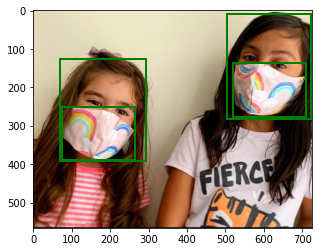

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import matplotlib.patches as p
from matplotlib.patches import Rectangle

#print(dicty)
arrFin = []
for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    #print(dicty[train.loc[idx , "name"]])
    val = dicty[train.loc[idx , "name"]]
    arrFin.append(val)
train["commonPosition"] = arrFin


image = "CVKaggleData/Medical mask/Medical mask/Medical mask/images/2756.png"
img = imread(image)

train = train[(train.classname == "face_with_mask")| (train.classname == "mask_surgical")| (train.classname == "face_with_mask_incorrect") |  (train.classname == "face_shield")|  (train.classname == "gas_mask") |  (train.classname == "face_no_mask")]    
#display(train)
print(len(train))

fig , axis1 = plt.subplots()
axis1.imshow(img)
myArr = []



for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    if train.loc[idx , "name"] == "CVKaggleData/Medical mask/Medical mask/Medical mask/images/2756.png":
        print("here")
        arr = train.loc[idx , "commonPosition"]
        for i in arr:
            if i not in myArr:
                myArr.append(i)
print(myArr)
#train.loc[idx, "name"] = "CVKaggleData/mm/mm/mm/images/" + train.loc[idx , "name"]
print(myArr)
#train["newCol"] = myList
for i in range(len(myArr)):
    plt.gca().add_patch(Rectangle((myArr[i][0],myArr[i][1]),myArr[i][2]-myArr[i][0],myArr[i][3]-myArr[i][1],linewidth=2,edgecolor='green',facecolor='none'))

plt.show()








In [6]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img 
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
dataFrame = pd.DataFrame([], columns=['name', 'classname', 'commonPosition'])

array = []
val = []
val1 = []
val2 = []

for idx, row in train.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if train.loc[idx , "name"] not in array:
        val1.append(train.loc[idx , "name"])
        val2.append(train.loc[idx , "classname"])
        val.append(train.loc[idx , "commonPosition"])
        array.append(train.loc[idx , "name"])
    else:
        continue
dataFrame["name"] = val1
dataFrame["commonPosition"] = val
dataFrame["classname"] = val2

#display(dataFrame)
#for i in train:
#    df.drop(['Cochice', 'Pima'])

for idx, row in dataFrame.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if dataFrame.loc[idx , "classname"] == "mask_surgical" or dataFrame.loc[idx , "classname"] == "face_shield" or dataFrame.loc[idx , "classname"] == "gas_mask":
        dataFrame.loc[idx , "classname"] = "face_with_mask"
     
    elif dataFrame.loc[idx , "classname"] == "face_with_mask_incorrect" or dataFrame.loc[idx , "classname"] == "face_no_mask":
        dataFrame.loc[idx , "classname"] = "mask_incorrect"
#display(dataFrame)
labels = []
for idx, row in dataFrame.iterrows():
    #print("oh: " , train.loc[idx , "name"])
    
    if dataFrame.loc[idx , "classname"] == "face_with_mask" :
        labels.append(1)
     
    elif dataFrame.loc[idx , "classname"] == "mask_incorrect":
        labels.append(0)


#mylabels = dataFrame["classname"]
print(labels)
trainX,testX,trainY,testY = train_test_split(dataFrame, labels, test_size=0.20, shuffle=False)

display(trainX)
display(trainY)




[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

name       classname  \
0     CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
1     CVKaggleData/Medical mask/Medical mask/Medical...  mask_incorrect   
2     CVKaggleData/Medical mask/Medical mask/Medical...  mask_incorrect   
3     CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
4     CVKaggleData/Medical mask/Medical mask/Medical...  mask_incorrect   
...                                                 ...             ...   
2812  CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
2813  CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
2814  CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
2815  CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   
2816  CVKaggleData/Medical mask/Medical mask/Medical...  face_with_mask   

                                         commonPosition  
0     [[69, 126, 294, 392], [505, 10, 723, 283], [75...  
1                                 [[360, 85, 728, 653]]  
2           [[218, 98, 577, 580], [278, 386, 582, 582]]  
3            [[239, 9, 522, 342], [255, 159, 491, 341]]  
4             [[262, 18, 484, 319], [49, 58, 191, 247]]  
...                                                 ...  
2812  [[193, 58, 438, 344], [194, 189, 429, 342], [2...  
2813          [[64, 60, 381, 520], [73, 279, 366, 513]]  
2814       [[395, 205, 483, 299], [440, 254, 475, 296]]  
2815  [[105, 191, 600, 830], [180, 127, 553, 693], [...  
2816        [[390, 24, 763, 372], [401, 194, 621, 368]]  

[2817 rows x 3 columns]

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [9]:
import cv2
import os
"""
iata = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

"""

counter = 0
count = []
for idx, row in dataFrame.iterrows():
    emptyArr = []
    #print(dataFrame.loc[idx , "name"])
    emptyArr.append(dataFrame.loc[idx , "name"])
    emptyArr.append(dataFrame.loc[idx , "classname"])
    emptyArr.append(dataFrame.loc[idx , "commonPosition"])
    try:
        myArr=cv2.imread(emptyArr[0],cv2.IMREAD_GRAYSCALE)
        counter+=1 ### just to show us what iteration of the loop we are currently on
        for i in emptyArr[2]:
            myImg = myArr[i[1]:i[3],i[0]:i[2]]
            imArr=cv2.resize(myImg,(50,50))
            count.append([imArr,emptyArr[1]])
    except Exception as e:
        print(str(e))

        
print(count)






"""
images=os.path.join("/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images")
img_size=50
data=[]
path='/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images/'
def create_data():
    for i in range(len(dataFrame)):
        arr=[]
        print("i: ", i)
        for j in valueee.iloc[i]:
            arr.append(j) 
            print("j: ", j)
        print("aaaarrr: " , arr)
        img_array=cv2.imread(arr[0],cv2.IMREAD_GRAYSCALE)
        print("aaaarrr: " , img_array)

        crop_image = img_array[arr[2]:arr[4],arr[1]:arr[3]]
        print("cropImage: " , crop_image)
        new_img_array=cv2.resize(crop_image,(img_size,img_size))
        data.append([new_img_array,arr[5]])
            
create_data()
"""







OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

[[array([[212, 212, 211, ..., 225, 224, 224],
       [212, 211, 211, ..., 223, 222, 225],
       [210, 210, 209, ..., 221, 223, 223],
       ...,
       [  5,   4,   2, ...,  51, 124, 130],
       [ 12,   5,   0, ...,  55, 120, 128],
       [ 16,   3,   3, ...,  54, 110, 124]], dtype=uint8), 'face_with_mask'], [array([[216, 216, 217, ..., 226, 223, 222],
       [215, 216, 216, ..., 226, 224, 222],
       [213, 213, 215, ..., 224, 224, 222],
       ...,
       [ 17,   2,   2, ...,  23,  27,   6],
       [ 10,   8,   2, ...,  18,  30,  15],
       [  1,  26,   4, ...,  23,  34,  12]], dtype=uint8), 'face_with_mask'], [array([[ 55,  27,  35, ..., 132, 114, 114],
       [ 32,  34,  45, ...,  95, 123,  86],
       [ 35,  44,  51, ...,  95, 112,  77],
       ...,
  

'\nimages=os.path.join("/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images")\nimg_size=50\ndata=[]\npath=\'/kaggle/input/face-mask-detection-dataset/Medical mask/Medical mask/Medical Mask/images/\'\ndef create_data():\n    for i in range(len(dataFrame)):\n        arr=[]\n        print("i: ", i)\n        for j in valueee.iloc[i]:\n            arr.append(j) \n            print("j: ", j)\n        print("aaaarrr: " , arr)\n        img_array=cv2.imread(arr[0],cv2.IMREAD_GRAYSCALE)\n        print("aaaarrr: " , img_array)\n\n        crop_image = img_array[arr[2]:arr[4],arr[1]:arr[3]]\n        print("cropImage: " , crop_image)\n        new_img_array=cv2.resize(crop_image,(img_size,img_size))\n        data.append([new_img_array,arr[5]])\n            \ncreate_data()\n'

In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import tensorflow as tf

track = []
labels = LabelEncoder()
for i in range(len(count)):
    #print(count)
    if count[i][1] == "face_with_mask":
        track.append(1)
    if count[i][1] == "mask_incorrect":
        track.append(0)
#print(track)    
myLab = []
myFeat = []
for i in count:
    myLab.append(i[1])
    myFeat.append(i[0])

    
myFeat=np.array(myFeat)
myFeat = myFeat.reshape(-1,50,50,1)
myFeat=tf.keras.utils.normalize(myFeat,axis=1)
print(track)
track = to_categorical(track)
print(myFeat)
print(track)


[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 

In [19]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout

#model=Sequential()
#model.add(Conv2D(100,(3,3),input_shape=x.shape[1:],activation='relu',strides=2))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
#my_model = model.fit(myFeat,track,epochs=30,batch_size=5)




model = Sequential([
    Conv2D(100,(3,3),activation='relu',strides=2),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax'),
])

 
model.compile(
    optimizer='adam', # or try putting optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-5)
    #We can also use any fromthis (https://keras.io/api/optimizers/)
    loss='categorical_crossentropy',
    metrics=[
        'MeanSquaredError',
        'accuracy',]#(other metrics https://keras.io/api/metrics/)
)

actualModel = model.fit(myFeat,track,epochs=30,batch_size=5)

Epoch 1/30
2644/2644 [==============================] - 12s 5ms/step - loss: 0.4347 - mean_squared_error: 0.1318 - accuracy: 0.8454
Epoch 2/30
2644/2644 [==============================] - 11s 4ms/step - loss: 0.3947 - mean_squared_error: 0.1201 - accuracy: 0.8453
Epoch 3/30
2644/2644 [==============================] - 11s 4ms/step - loss: 0.3785 - mean_squared_error: 0.1142 - accuracy: 0.8504
Epoch 4/30
2644/2644 [==============================] - 12s 4ms/step - loss: 0.3621 - mean_squared_error: 0.1092 - accuracy: 0.8543
Epoch 5/30
2644/2644 [==============================] - 12s 5ms/step - loss: 0.3536 - mean_squared_error: 0.1062 - accuracy: 0.8614
Epoch 6/30
2644/2644 [==============================] - 13s 5ms/step - loss: 0.3447 - mean_squared_error: 0.1035 - accuracy: 0.8631
Epoch 7/30
2644/2644 [==============================] - 13s 5ms/step - loss: 0.3397 - mean_squared_error: 0.1016 - accuracy: 0.8660
Epoch 8/30
2644/2644 [==============================] - 12s 5ms/step - loss:

AttributeError: 'History' object has no attribute 'summary'

In [28]:
print(model.summary())
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 100)       1000      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        57664     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                80050     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)               